## Looking into the collected data (csv) and perform basic data cleaning for machine learning

In [1]:
import pandas as pd
import ast
import pandas as pd
import numpy as np
import json
from scipy.signal import spectrogram
import matplotlib.pyplot as plt
from scipy.signal import stft

In [2]:
# Load the CSV file
df = pd.read_csv('data\experiment_data_03-12_14-34_LabMichael.csv')
df

,word,label,user_input,channel_0,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7
0,merit,1,1,"[90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97....","[11787.99710130657, 11763.812513805928, 11710....","[11254.617423369578, 11231.148091691506, 11158...","[16406.38159589548, 16390.44480209885, 16337.2...","[-17321.90904878486, -17351.1451305324, -17418...","[4174.3223874953255, 4153.6023203852565, 4113....","[1937.5162646193821, 1919.6572207995919, 1870....","[8696.236753015131, 8693.845116358414, 8639.53..."
1,scark,0,0,"[148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154...","[11659.54162592192, 11607.126785174225, 11583....","[11220.866289242065, 11174.933454386408, 11144...","[16427.034607772184, 16376.51966530319, 16355....","[-17294.75167927166, -17359.3482207475, -17382...","[4181.407890487658, 4135.922090521109, 4105.32...","[2006.6725619641022, 1958.8845323186556, 1941....","[8785.062585480522, 8740.82848320347, 8719.661..."
2,trunk,1,1,"[86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93....","[11464.969690438473, 11497.714996065497, 11595...","[11088.990996955752, 11124.7761398287, 11208.5...","[16327.502289712704, 16352.402133035916, 16425...","[-17421.709587777805, -17377.0508023561, -1728...","[4017.480196652436, 4043.452923709503, 4113.12...","[1908.0566654272875, 1941.4948751324268, 2013....","[8654.215473439155, 8683.831534842437, 8756.58..."
3,booby,1,0,"[144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150...","[11423.484852729423, 11494.585751841754, 11506...","[10937.334410826494, 10986.396489905894, 11017...","[16326.295295512116, 16368.294223343639, 16380...","[-17425.889363990947, -17363.81856963856, -173...","[3997.4977371093914, 4043.877606854154, 4058.3...","[1917.198528909508, 1967.8252301007785, 1983.5...","[8563.132114783779, 8628.958002204658, 8641.87..."
4,elder,1,1,"[82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89....","[11444.383733795135, 11383.944616787985, 11324...","[10987.201152706284, 10940.128378883408, 10870...","[16445.05011380316, 16408.192087196363, 16343....","[-17342.316191472553, -17409.818459727583, -17...","[4009.3441616707046, 3977.7611467553556, 3921....","[1978.0846808057645, 1930.2742994158625, 1876....","[8573.615082933316, 8522.407236386209, 8452.26..."
...,...,...,...,...,...,...,...,...,...,...,...
195,chasf,0,0,"[163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169...","[12029.038313512601, 12087.53282875214, 12073....","[11117.109491480529, 11191.540800516701, 11107...","[16274.282786164616, 16279.60250134498, 16287....","[-17959.9395942616, -17935.196213149575, -1792...","[3866.7623837903006, 3886.6107328666135, 3889....","[3837.325136342661, 3857.5758168191696, 3862.0...","[7253.208130980508, 7279.605541182225, 7284.92..."
196,eerie,1,1,"[101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107...","[12001.702130043761, 11972.667213996318, 11964...","[11143.953936571354, 11123.367979928014, 11139...","[16270.594748329491, 16332.576135704057, 16296...","[-17940.538280074394, -17888.43636374907, -179...","[3847.5845870476473, 3826.1269123705524, 3788....","[3863.9684157333872, 3856.1229534295744, 3817....","[7251.330584446262, 7226.006057978399, 7205.46..."
197,spoke,1,1,"[160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166...","[11867.301090634, 11861.579044053442, 11914.95...","[10990.330396930027, 10996.968865033254, 11036...","[16214.201297068752, 16219.364550037928, 16248...","[-18013.829650143343, -18000.7985831259, -1796...","[3721.811320997634, 3715.217556383319, 3746.39...","[3816.828586677145, 3818.728484955846, 3849.55...","[7176.653406221081, 7165.946920626989, 7201.15..."
198,snadt,0,0,"[97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0,...","[11808.851278883372, 11854.001802683093, 11876...","[10986.284731183618, 11000.500440657192, 11032...","[16161.00414526512, 16191.804849124534, 16219....","[-18044.831519702857, -18000.23978951452, -179...","[3676.593741964548, 3705.3604370785283, 3721.9...","[3785.17851652843, 3813.878156409044, 3835.581...","[7158.280272278818, 7181.973121401445, 7

In [5]:
len(df['channel_1'].iloc[1])

2369

In [69]:
import pandas as pd
import numpy as np
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

# Load the CSV file
# data = pd.read_csv('/mnt/data/experiment_data_03-12_14-34_LabMichael.csv')

# Define your sampling frequency (Hz)
fs = 250  # adjust as needed

# List the channel names (adjust as needed)
channels = ['ch1', 'ch2', 'ch3', 'ch4']

# Set parameters for the spectrogram calculation
nperseg = 256   # window length in samples
noverlap = 128  # number of overlapping samples

# Process one channel as an example (you can loop over channels similarly)
ch = 'channel_1'
f, t, Sxx = spectrogram(df[ch].values, fs, nperseg=nperseg, noverlap=noverlap)
# For each time window, identify the dominant frequency
dominant_freqs = f[np.argmax(Sxx, axis=0)]

# Plot the time-varying dominant frequency
plt.figure(figsize=(8, 4))
plt.plot(t, dominant_freqs, marker='o')
plt.xlabel('Time (s)')
plt.ylabel('Dominant Frequency (Hz)')
plt.title(f"Time-Varying Dominant Frequency for {ch}")
plt.grid(True)
plt.show()

# If you wish to merge this information back into your dataframe,
# note that the time axis 't' from the spectrogram may not align one-to-one with your original data rows.
# You could, for example, create a new dataframe with these values:
dom_df = pd.DataFrame({'time': t, f"{ch}_dominant_frequency": dominant_freqs})
print(dom_df.head())


C:\Users\Luna\AppData\Local\Temp\ipykernel_34504\2114933967.py:21: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  f, t, Sxx = spectrogram(df[ch].values, fs, nperseg=nperseg, noverlap=noverlap)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

## Add column time and frequency for each channels

In [51]:
def frequencies(row, column):
    channel_data = json.loads(row[column])

    # Convert the accumulated list to a numpy array
    eeg_signal = np.array(channel_data)  
    # Define the sampling rate (250 Hz in your case)
    fs = 250

    # Compute the spectrogram using a sliding window
    frequencies, times, Sxx = spectrogram(eeg_signal, fs)

    return frequencies, times


In [53]:
channel_data_list = []
time_list = []
channel_0_list = []
channel_1_list = []
channel_2_list = []
channel_3_list = []
channel_4_list = []
channel_5_list = []
channel_6_list = []
channel_7_list = []
# Iterate over each row to parse and accumulate the channel data
for idx, row in df.iterrows():
    # Each channel column is a JSON array stored as a string
    channel_0_freqm, times = frequencies(row, 'channel_0')
    time_list.append(times)
    channel_0_list.append(channel_0_freqm)

    



C:\Users\Luna\AppData\Local\Temp\ipykernel_34504\488652676.py:10: UserWarning: nperseg = 256 is greater than input length  = 240, using nperseg = 240
  frequencies, times, Sxx = spectrogram(eeg_signal, fs)
C:\Users\Luna\AppData\Local\Temp\ipykernel_34504\488652676.py:10: UserWarning: nperseg = 256 is greater than input length  = 120, using nperseg = 120
  frequencies, times, Sxx = spectrogram(eeg_signal, fs)
C:\Users\Luna\AppData\Local\Temp\ipykernel_34504\488652676.py:10: UserWarning: nperseg = 256 is greater than input length  = 241, using nperseg = 241
  frequencies, times, Sxx = spectrogram(eeg_signal, fs)
C:\Users\Luna\AppData\Local\Temp\ipykernel_34504\488652676.py:10: UserWarning: nperseg = 256 is greater than input length  = 121, using nperseg = 121
  frequencies, times, Sxx = spectrogram(eeg_signal, fs)
C:\Users\Luna\AppData\Local\Temp\ipykernel_34504\488652676.py:10: UserWarning: nperseg = 256 is greater than input length  = 151, using nperseg = 151
  frequencies, times, Sxx 

In [54]:
df['time'] = time_list
df['channel_0_freq'] = channel_0_list

In [55]:
df

,word,label,user_input,channel_0,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,time,channel_0_freq
0,merit,1,1,"[90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97....","[11787.99710130657, 11763.812513805928, 11710....","[11254.617423369578, 11231.148091691506, 11158...","[16406.38159589548, 16390.44480209885, 16337.2...","[-17321.90904878486, -17351.1451305324, -17418...","[4174.3223874953255, 4153.6023203852565, 4113....","[1937.5162646193821, 1919.6572207995919, 1870....","[8696.236753015131, 8693.845116358414, 8639.53...",[0.48],"[0.0, 1.0416666666666667, 2.0833333333333335, ..."
1,scark,0,0,"[148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154...","[11659.54162592192, 11607.126785174225, 11583....","[11220.866289242065, 11174.933454386408, 11144...","[16427.034607772184, 16376.51966530319, 16355....","[-17294.75167927166, -17359.3482207475, -17382...","[4181.407890487658, 4135.922090521109, 4105.32...","[2006.6725619641022, 1958.8845323186556, 1941....","[8785.062585480522, 8740.82848320347, 8719.661...",[0.24],"[0.0, 2.0833333333333335, 4.166666666666667, 6..."
2,trunk,1,1,"[86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93....","[11464.969690438473, 11497.714996065497, 11595...","[11088.990996955752, 11124.7761398287, 11208.5...","[16327.502289712704, 16352.402133035916, 16425...","[-17421.709587777805, -17377.0508023561, -1728...","[4017.480196652436, 4043.452923709503, 4113.12...","[1908.0566654272875, 1941.4948751324268, 2013....","[8654.215473439155, 8683.831534842437, 8756.58...",[0.48],"[0.0, 1.0416666666666667, 2.0833333333333335, ..."
3,booby,1,0,"[144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150...","[11423.484852729423, 11494.585751841754, 11506...","[10937.334410826494, 10986.396489905894, 11017...","[16326.295295512116, 16368.294223343639, 16380...","[-17425.889363990947, -17363.81856963856, -173...","[3997.4977371093914, 4043.877606854154, 4058.3...","[1917.198528909508, 1967.8252301007785, 1983.5...","[8563.132114783779, 8628.958002204658, 8641.87...",[0.24],"[0.0, 2.0833333333333335, 4.166666666666667, 6..."
4,elder,1,1,"[82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89....","[11444.383733795135, 11383.944616787985, 11324...","[10987.201152706284, 10940.128378883408, 10870...","[16445.05011380316, 16408.192087196363, 16343....","[-17342.316191472553, -17409.818459727583, -17...","[4009.3441616707046, 3977.7611467553556, 3921....","[1978.0846808057645, 1930.2742994158625, 1876....","[8573.615082933316, 8522.407236386209, 8452.26...",[0.48],"[0.0, 1.0416666666666667, 2.0833333333333335, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,chasf,0,0,"[163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169...","[12029.038313512601, 12087.53282875214, 12073....","[11117.109491480529, 11191.540800516701, 11107...","[16274.282786164616, 16279.60250134498, 16287....","[-17959.9395942616, -17935.196213149575, -1792...","[3866.7623837903006, 3886.6107328666135, 3889....","[3837.325136342661, 3857.5758168191696, 3862.0...","[7253.208130980508, 7279.605541182225, 7284.92...",[0.242],"[0.0, 2.066115702479339, 4.132231404958678, 6...."
196,eerie,1,1,"[101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107...","[12001.702130043761, 11972.667213996318, 11964...","[11143.953936571354, 11123.367979928014, 11139...","[16270.594748329491, 16332.576135704057, 16296...","[-17940.538280074394, -17888.43636374907, -179...","[3847.5845870476473, 3826.1269123705524, 3788....","[3863.9684157333872, 3856.1229534295744, 3817....","[7251.330584446262, 7226.006057978399, 7205.46...",[0.482],"[0.0, 1.037344398340249, 2.074688796680498, 3...."
197,spoke,1,1,"[160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166...","[11867.301090634, 11861.579044053442, 11914.95...","[10990.330396930027, 10996.968865033254, 11036...","[16214.201297068752, 16219.364550037928, 16248...","[-18013.829650143343, -18000.7985831259, -1796...","[3721.811320997634, 3715.217556383319, 3746.39...","[3816.828586677145, 3818.728484955846, 3849.55...","[7176.653406221081, 7165.94

In [30]:
df = pd.read_csv("data/experiment_data_03-12_14-34_LabMichael.csv")

# Identify the EEG channel columns (assuming 8 channels)
channel_columns = [f"channel_{i}" for i in range(8)]

# Parse the JSON-encoded lists in each EEG channel column
for col in channel_columns:
    df[col] = df[col].apply(json.loads)

# Now, each cell in the channel columns is a list of EEG samples
print(df.head())

    word  label  user_input  \
0  merit      1           1   
1  scark      0           0   
2  trunk      1           1   
3  booby      1           0   
4  elder      1           1   

                                           channel_0  \
0  [90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97....   
1  [148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154...   
2  [86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93....   
3  [144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150...   
4  [82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89....   

                                           channel_1  \
0  [11787.99710130657, 11763.812513805928, 11710....   
1  [11659.54162592192, 11607.126785174225, 11583....   
2  [11464.969690438473, 11497.714996065497, 11595...   
3  [11423.484852729423, 11494.585751841754, 11506...   
4  [11444.383733795135, 11383.944616787985, 11324...   

                                           channel_2  \
0  [11254.617423369578, 11231.148091691506, 11158...   
1  [11220.866289242065, 111

In [31]:
df

,word,label,user_input,channel_0,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7
0,merit,1,1,"[90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97....","[11787.99710130657, 11763.812513805928, 11710....","[11254.617423369578, 11231.148091691506, 11158...","[16406.38159589548, 16390.44480209885, 16337.2...","[-17321.90904878486, -17351.1451305324, -17418...","[4174.3223874953255, 4153.6023203852565, 4113....","[1937.5162646193821, 1919.6572207995919, 1870....","[8696.236753015131, 8693.845116358414, 8639.53..."
1,scark,0,0,"[148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154...","[11659.54162592192, 11607.126785174225, 11583....","[11220.866289242065, 11174.933454386408, 11144...","[16427.034607772184, 16376.51966530319, 16355....","[-17294.75167927166, -17359.3482207475, -17382...","[4181.407890487658, 4135.922090521109, 4105.32...","[2006.6725619641022, 1958.8845323186556, 1941....","[8785.062585480522, 8740.82848320347, 8719.661..."
2,trunk,1,1,"[86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93....","[11464.969690438473, 11497.714996065497, 11595...","[11088.990996955752, 11124.7761398287, 11208.5...","[16327.502289712704, 16352.402133035916, 16425...","[-17421.709587777805, -17377.0508023561, -1728...","[4017.480196652436, 4043.452923709503, 4113.12...","[1908.0566654272875, 1941.4948751324268, 2013....","[8654.215473439155, 8683.831534842437, 8756.58..."
3,booby,1,0,"[144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150...","[11423.484852729423, 11494.585751841754, 11506...","[10937.334410826494, 10986.396489905894, 11017...","[16326.295295512116, 16368.294223343639, 16380...","[-17425.889363990947, -17363.81856963856, -173...","[3997.4977371093914, 4043.877606854154, 4058.3...","[1917.198528909508, 1967.8252301007785, 1983.5...","[8563.132114783779, 8628.958002204658, 8641.87..."
4,elder,1,1,"[82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89....","[11444.383733795135, 11383.944616787985, 11324...","[10987.201152706284, 10940.128378883408, 10870...","[16445.05011380316, 16408.192087196363, 16343....","[-17342.316191472553, -17409.818459727583, -17...","[4009.3441616707046, 3977.7611467553556, 3921....","[1978.0846808057645, 1930.2742994158625, 1876....","[8573.615082933316, 8522.407236386209, 8452.26..."
...,...,...,...,...,...,...,...,...,...,...,...
195,chasf,0,0,"[163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169...","[12029.038313512601, 12087.53282875214, 12073....","[11117.109491480529, 11191.540800516701, 11107...","[16274.282786164616, 16279.60250134498, 16287....","[-17959.9395942616, -17935.196213149575, -1792...","[3866.7623837903006, 3886.6107328666135, 3889....","[3837.325136342661, 3857.5758168191696, 3862.0...","[7253.208130980508, 7279.605541182225, 7284.92..."
196,eerie,1,1,"[101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107...","[12001.702130043761, 11972.667213996318, 11964...","[11143.953936571354, 11123.367979928014, 11139...","[16270.594748329491, 16332.576135704057, 16296...","[-17940.538280074394, -17888.43636374907, -179...","[3847.5845870476473, 3826.1269123705524, 3788....","[3863.9684157333872, 3856.1229534295744, 3817....","[7251.330584446262, 7226.006057978399, 7205.46..."
197,spoke,1,1,"[160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166...","[11867.301090634, 11861.579044053442, 11914.95...","[10990.330396930027, 10996.968865033254, 11036...","[16214.201297068752, 16219.364550037928, 16248...","[-18013.829650143343, -18000.7985831259, -1796...","[3721.811320997634, 3715.217556383319, 3746.39...","[3816.828586677145, 3818.728484955846, 3849.55...","[7176.653406221081, 7165.946920626989, 7201.15..."
198,snadt,0,0,"[97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0,...","[11808.851278883372, 11854.001802683093, 11876...","[10986.284731183618, 11000.500440657192, 11032...","[16161.00414526512, 16191.804849124534, 16219....","[-18044.831519702857, -18000.23978951452, -179...","[3676.593741964548, 3705.3604370785283, 3721.9...","[3785.17851652843, 3813.878156409044, 3835.581...","[7158.280272278818, 7181.973121401445, 7

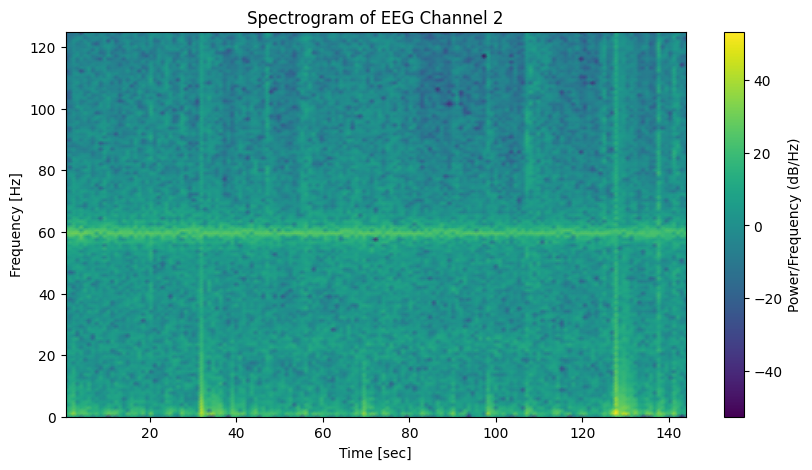

array([  0.       ,   0.9765625,   1.953125 ,   2.9296875,   3.90625  ,
         4.8828125,   5.859375 ,   6.8359375,   7.8125   ,   8.7890625,
         9.765625 ,  10.7421875,  11.71875  ,  12.6953125,  13.671875 ,
        14.6484375,  15.625    ,  16.6015625,  17.578125 ,  18.5546875,
        19.53125  ,  20.5078125,  21.484375 ,  22.4609375,  23.4375   ,
        24.4140625,  25.390625 ,  26.3671875,  27.34375  ,  28.3203125,
        29.296875 ,  30.2734375,  31.25     ,  32.2265625,  33.203125 ,
        34.1796875,  35.15625  ,  36.1328125,  37.109375 ,  38.0859375,
        39.0625   ,  40.0390625,  41.015625 ,  41.9921875,  42.96875  ,
        43.9453125,  44.921875 ,  45.8984375,  46.875    ,  47.8515625,
        48.828125 ,  49.8046875,  50.78125  ,  51.7578125,  52.734375 ,
        53.7109375,  54.6875   ,  55.6640625,  56.640625 ,  57.6171875,
        58.59375  ,  59.5703125,  60.546875 ,  61.5234375,  62.5      ,
        63.4765625,  64.453125 ,  65.4296875,  66.40625  ,  67.3

In [10]:
import pandas as pd
import numpy as np
import json
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('data/experiment_data_03-12_14-34_LabMichael.csv')

# Assume we're interested in channel_0
channel_data_list = []

# Iterate over each row to parse and accumulate the channel data
for idx, row in df.iterrows():
    # Each channel column is a JSON array stored as a string
    channel_data = json.loads(row['channel_2'])
    channel_data_list.extend(channel_data)

# Convert the accumulated list to a numpy array
eeg_signal = np.array(channel_data_list)

# Define the sampling rate (250 Hz in your case)
fs = 250

# Compute the spectrogram using a sliding window
frequencies, times, Sxx = spectrogram(eeg_signal, fs)

# Plot the spectrogram
plt.figure(figsize=(10, 5))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of EEG Channel 2')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.show()

frequencies


In [9]:
times

array([  0.512,   1.408,   2.304,   3.2  ,   4.096,   4.992,   5.888,
         6.784,   7.68 ,   8.576,   9.472,  10.368,  11.264,  12.16 ,
        13.056,  13.952,  14.848,  15.744,  16.64 ,  17.536,  18.432,
        19.328,  20.224,  21.12 ,  22.016,  22.912,  23.808,  24.704,
        25.6  ,  26.496,  27.392,  28.288,  29.184,  30.08 ,  30.976,
        31.872,  32.768,  33.664,  34.56 ,  35.456,  36.352,  37.248,
        38.144,  39.04 ,  39.936,  40.832,  41.728,  42.624,  43.52 ,
        44.416,  45.312,  46.208,  47.104,  48.   ,  48.896,  49.792,
        50.688,  51.584,  52.48 ,  53.376,  54.272,  55.168,  56.064,
        56.96 ,  57.856,  58.752,  59.648,  60.544,  61.44 ,  62.336,
        63.232,  64.128,  65.024,  65.92 ,  66.816,  67.712,  68.608,
        69.504,  70.4  ,  71.296,  72.192,  73.088,  73.984,  74.88 ,
        75.776,  76.672,  77.568,  78.464,  79.36 ,  80.256,  81.152,
        82.048,  82.944,  83.84 ,  84.736,  85.632,  86.528,  87.424,
        88.32 ,  89.